In [7]:
from googletrans import Translator
from textblob import TextBlob
# Inisialisasi Translator
translator = Translator()

# Dataset dalam bentuk list
df = ["agus anak baik", "mira anak jahat"]  # Gunakan list dengan tanda []

# Menerjemahkan setiap teks dalam list
translated_df = [translator.translate(text, dest='en').text for text in df]
textblob_results = [TextBlob(text).correct() for text in translated_df]
sentiment_scores = [blob.sentiment.polarity for blob in textblob_results]

print("Translated:", translated_df)  # Output: ['Agus is a good child', 'Mira is a bad child']
print("TextBlob Correction:", textblob_results)
print("Sentiment Scores:", sentiment_scores)


Translated: ['Agus is a good child', "Mira's evil son"]
TextBlob Correction: [TextBlob("Us is a good child"), TextBlob("Fire's evil son")]
Sentiment Scores: [0.7, -1.0]


In [5]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


In [9]:
df = pd.read_csv("Scrapping.csv", sep=';')
df = df[['full_text']] 
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,full_text
0,@heathengangs Mulai membaikmi fashion sense mu...
1,@chiseiyuu @21of12 dia satria mahatir ver jemb...
2,@nativora @manukacaramel Udah di posting si sa...
3,knp sih dia demen bgt pake hoodie gaya satria ...
4,@deduys kembaran satria mahatir ditolak sp yg ...


In [1]:
import pandas as pd
import re
import time
from nltk.corpus import stopwords
from deep_translator import GoogleTranslator

# Membaca dataset
df = pd.read_csv("Scrapping.csv", sep=';')
df = df[['full_text']]  
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Inisialisasi stopwords
stop_words = set(stopwords.words('indonesian'))

# Fungsi membersihkan teks
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['clean_text'] = df['full_text'].apply(clean_text)

# Fungsi translate dengan error handling
def translate_text(text):
    try:
        return GoogleTranslator(source='auto', target='en').translate(text)
    except Exception as e:
        print(f"Error: {e}")
        return text

# Inisialisasi kolom hasil translate
translated = []

# Proses per baris + delay tiap 50 baris
for i, row in df.iterrows():
    text = row['clean_text']
    if isinstance(text, str) and text.strip() != "":
        translated_text = translate_text(text)
    else:
        translated_text = ""
    translated.append(translated_text)
    
    # Delay tiap 50 baris
    if (i + 1) % 50 == 0:
        print(f"Translated {i+1} rows... sleeping 5 seconds.")
        time.sleep(5)

# Tambahkan hasil ke DataFrame
df['translated_text'] = translated

# Simpan hasil
df.to_csv("Translated_Scrapping.csv", index=False)

print("Terjemahan selesai! Dataset disimpan sebagai 'Translated_Scrapping.csv'.")


Translated 50 rows... sleeping 5 seconds.
Translated 100 rows... sleeping 5 seconds.
Translated 150 rows... sleeping 5 seconds.
Translated 200 rows... sleeping 5 seconds.
Translated 250 rows... sleeping 5 seconds.
Translated 300 rows... sleeping 5 seconds.
Translated 350 rows... sleeping 5 seconds.
Translated 400 rows... sleeping 5 seconds.
Translated 450 rows... sleeping 5 seconds.
Translated 500 rows... sleeping 5 seconds.
Translated 550 rows... sleeping 5 seconds.
Translated 600 rows... sleeping 5 seconds.
Translated 650 rows... sleeping 5 seconds.
Translated 700 rows... sleeping 5 seconds.
Translated 750 rows... sleeping 5 seconds.
Translated 800 rows... sleeping 5 seconds.
Translated 850 rows... sleeping 5 seconds.
Translated 900 rows... sleeping 5 seconds.
Translated 950 rows... sleeping 5 seconds.
Translated 1000 rows... sleeping 5 seconds.
Translated 1050 rows... sleeping 5 seconds.
Translated 1100 rows... sleeping 5 seconds.
Translated 1150 rows... sleeping 5 seconds.
Translat

In [3]:
# Simulasi label (ubah dengan label asli kamu!)
# 1: positif, 0: netral, -1: negatif
#df['label'] = np.random.choice([1, 0, -1], size=len(df))  

import pandas as pd
from textblob import TextBlob

# Membaca dataset
df = pd.read_csv("Translated_Scrapping.csv")

# Fungsi untuk menentukan label sentimen
def get_sentiment(text):
    if isinstance(text, str) and text.strip() != "":
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return "positive"
        elif polarity < 0:
            return "negative"
        else:
            return "neutral"
    else:
        return "neutral"

# Terapkan ke kolom
df['label'] = df['translated_text'].apply(get_sentiment)

# Simpan hasil
#df.to_csv("Labeled_Sentiment.csv", index=False)

#print("Sentimen selesai dilabeli! Dataset disimpan sebagai 'Labeled_Sentiment.csv'.")
df.head()

,full_text,clean_text,translated_text,label
0,@heathengangs Mulai membaikmi fashion sense mu...,membaikmi fashion sense mu mmg nda berkiblat s...,Improve your fashion sense mmg mmg and the rib...,neutral
1,@chiseiyuu @21of12 dia satria mahatir ver jemb...,satria mahatir ver jember cin,Satria Mahatir Ver Jember Cin,neutral
2,@nativora @manukacaramel Udah di posting si sa...,udah posting si satria mahatir,Already posted the Satria Mahatir,neutral
3,knp sih dia demen bgt pake hoodie gaya satria ...,knp sih demen bgt pake hoodie gaya satria mahatir,why is it really like using the hoodie style o...,positive
4,@deduys kembaran satria mahatir ditolak sp yg ...,kembaran satria mahatir ditolak sp yg ga kaget...,Kembatan Satria Mahatir was rejected SP who wa...,negative


In [9]:
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

# Pastikan kolom clean_text adalah string dan tidak kosong
df['clean_text'] = df['clean_text'].astype(str)
df = df[df['clean_text'].str.strip() != '']

# Tokenizer
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['clean_text'])

# Tokenizing
sequences = tokenizer.texts_to_sequences(df['clean_text'])
word_index = tokenizer.word_index

# Padding
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# One-hot label
y = pd.get_dummies(df['label']).values


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
df['label'].value_counts()


label
neutral     1052
positive     382
negative     265
Name: count, dtype: int64

In [13]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # 3 kelas: positif, netral, negatif

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
model.summary()


C:\Users\Nettaanell D\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,635 (4.26 MB)

 Trainable params: 1,117,635 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train,
                    epochs=11,
                    batch_size=128,
                    validation_data=(X_test, y_test))


Epoch 1/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8723 - loss: 0.4232 - val_accuracy: 0.6706 - val_loss: 0.7335
Epoch 2/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9022 - loss: 0.3002 - val_accuracy: 0.6647 - val_loss: 0.8164
Epoch 3/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9510 - loss: 0.1781 - val_accuracy: 0.6824 - val_loss: 0.8662
Epoch 4/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9627 - loss: 0.1363 - val_accuracy: 0.6912 - val_loss: 0.8986
Epoch 5/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9694 - loss: 0.1053 - val_accuracy: 0.6765 - val_loss: 1.0344
Epoch 6/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9780 - loss: 0.0669 - val_accuracy: 0.6882 - val_loss: 1.0663
Epoch 7/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9847 - loss: 0.0488 - val_accuracy: 0.7118 - val_loss: 1.1397
Epoch 8/11
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.9928 - loss: 0.0362 - val_accuracy: 0.7000 - val_loss:

Akurasi Test Set: 32.06%
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step
              precision    recall  f1-score   support

     Negatif       0.40      0.07      0.12       118
      Netral       0.28      0.33      0.30       106
     Positif       0.34      0.57      0.42       116

    accuracy                           0.32       340
   macro avg       0.34      0.32      0.28       340
weighted avg       0.34      0.32      0.28       340



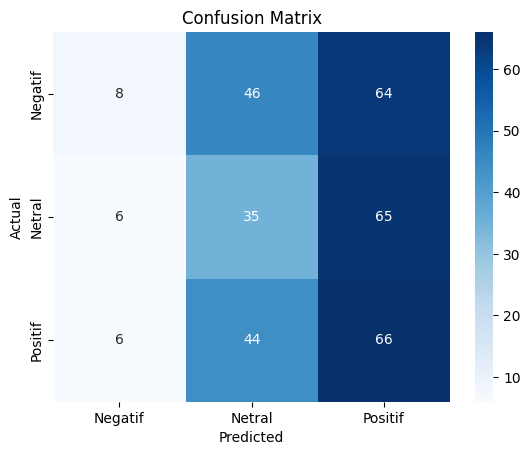

In [49]:
# Akurasi
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Akurasi Test Set: {accuracy * 100:.2f}%")

# Laporan klasifikasi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['Negatif', 'Netral', 'Positif']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
